Normal Test on uminusr


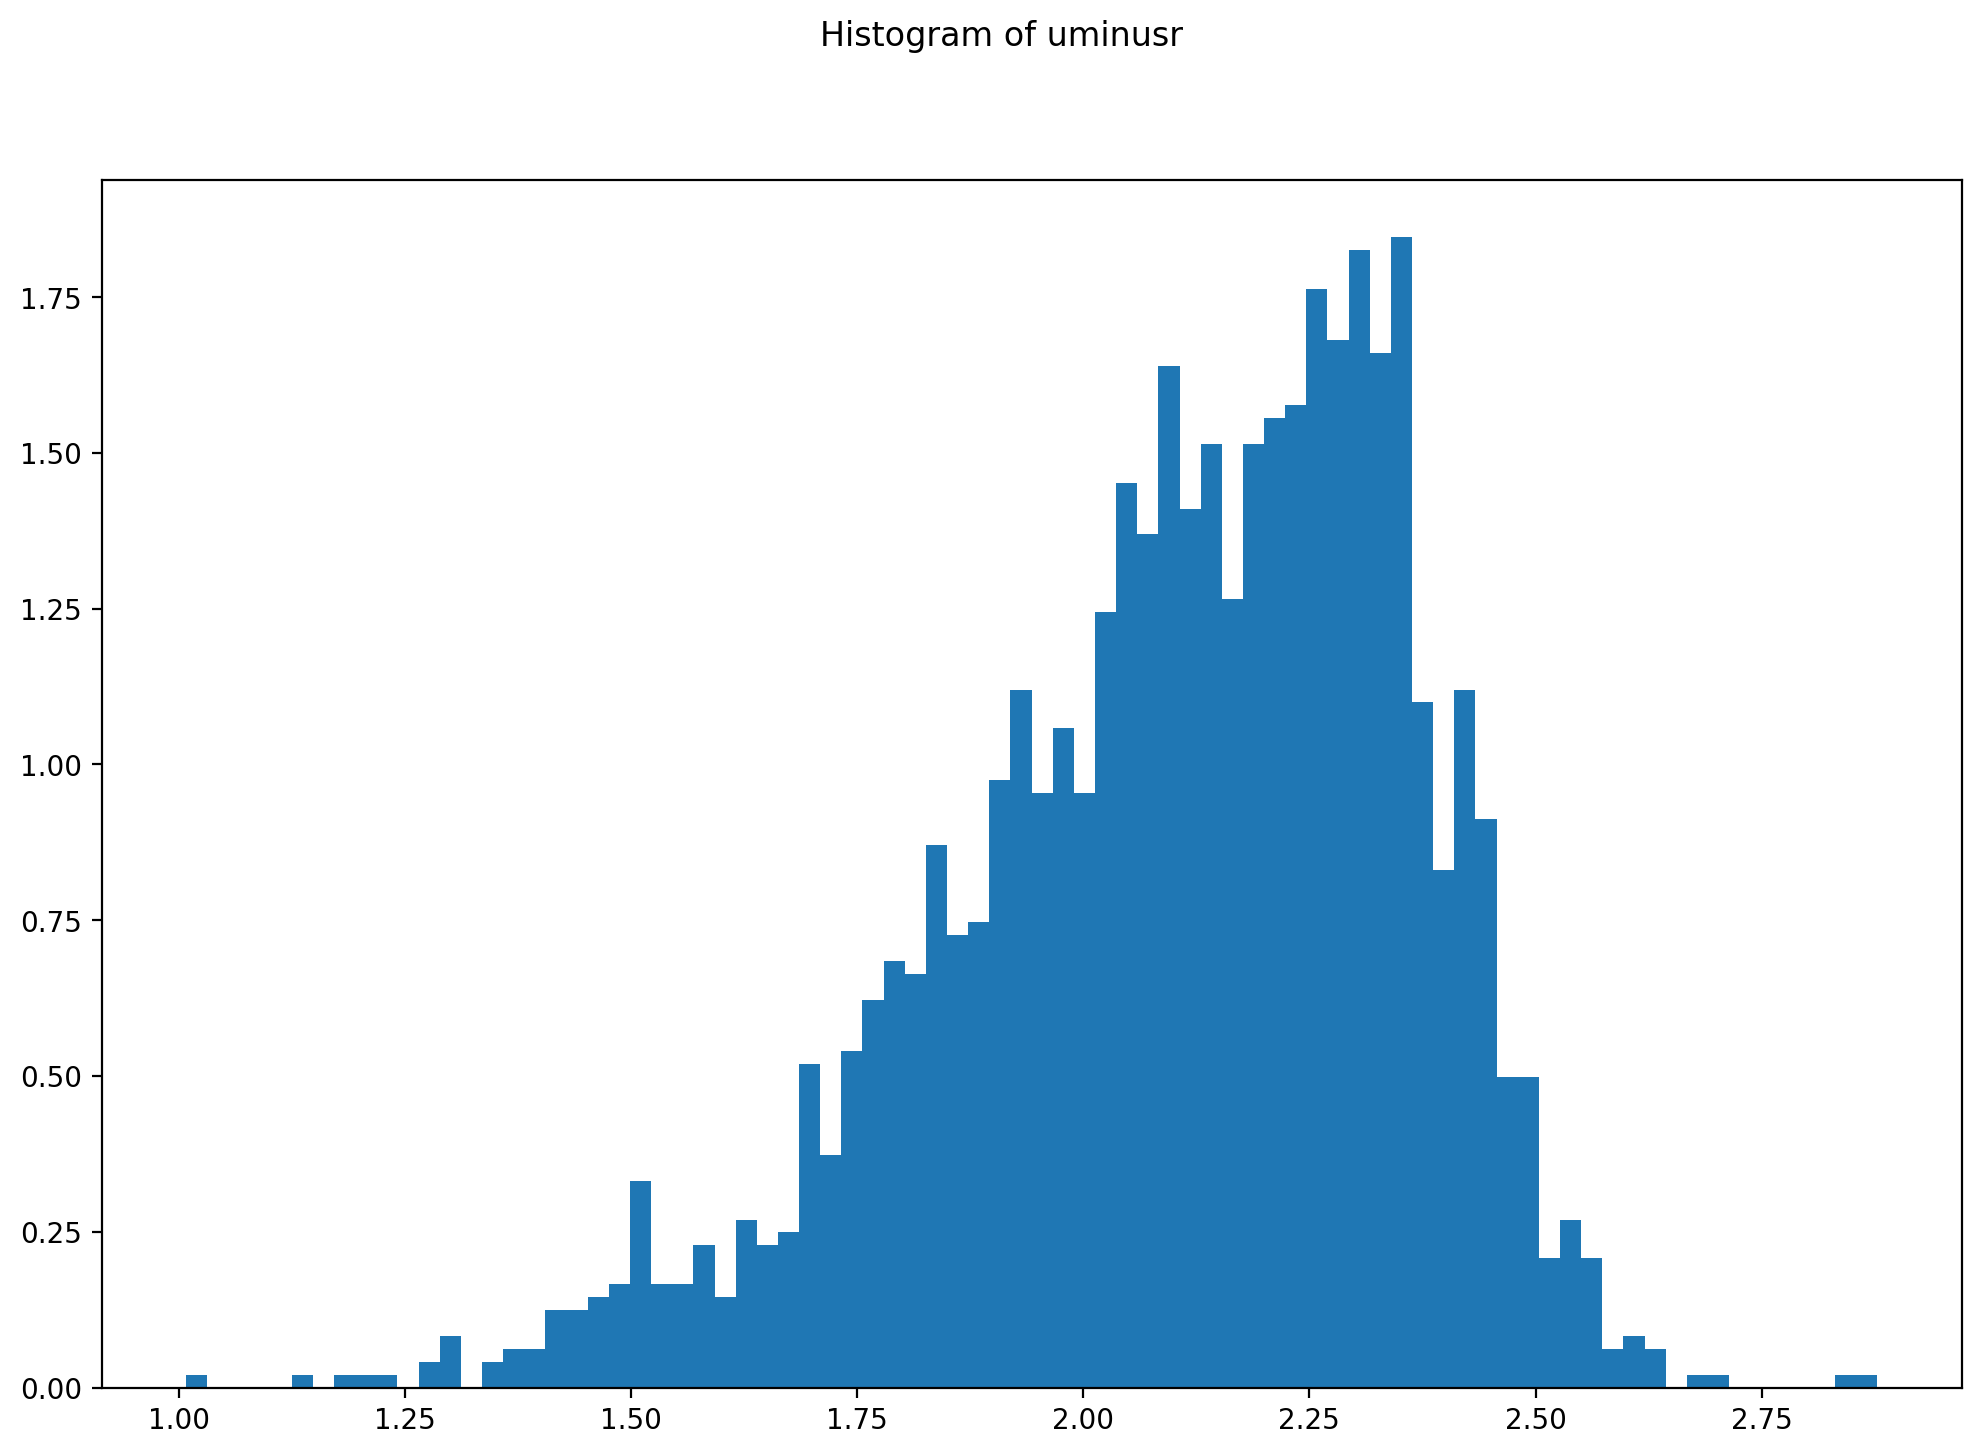

kstest uminusr norm : 0.9127587600406205, 0.0
kstest uminusr norm greater : 0.002381614147061173, 0.9753214630899972
kstest uminusr norm less : 0.9127587600406205, 0.0
Shapiro uminusr 0.970382571220398,3.264082808350377e-20
Anderson uminusr 16.613927457114187,[0.575 0.655 0.785 0.916 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on CountInCyl


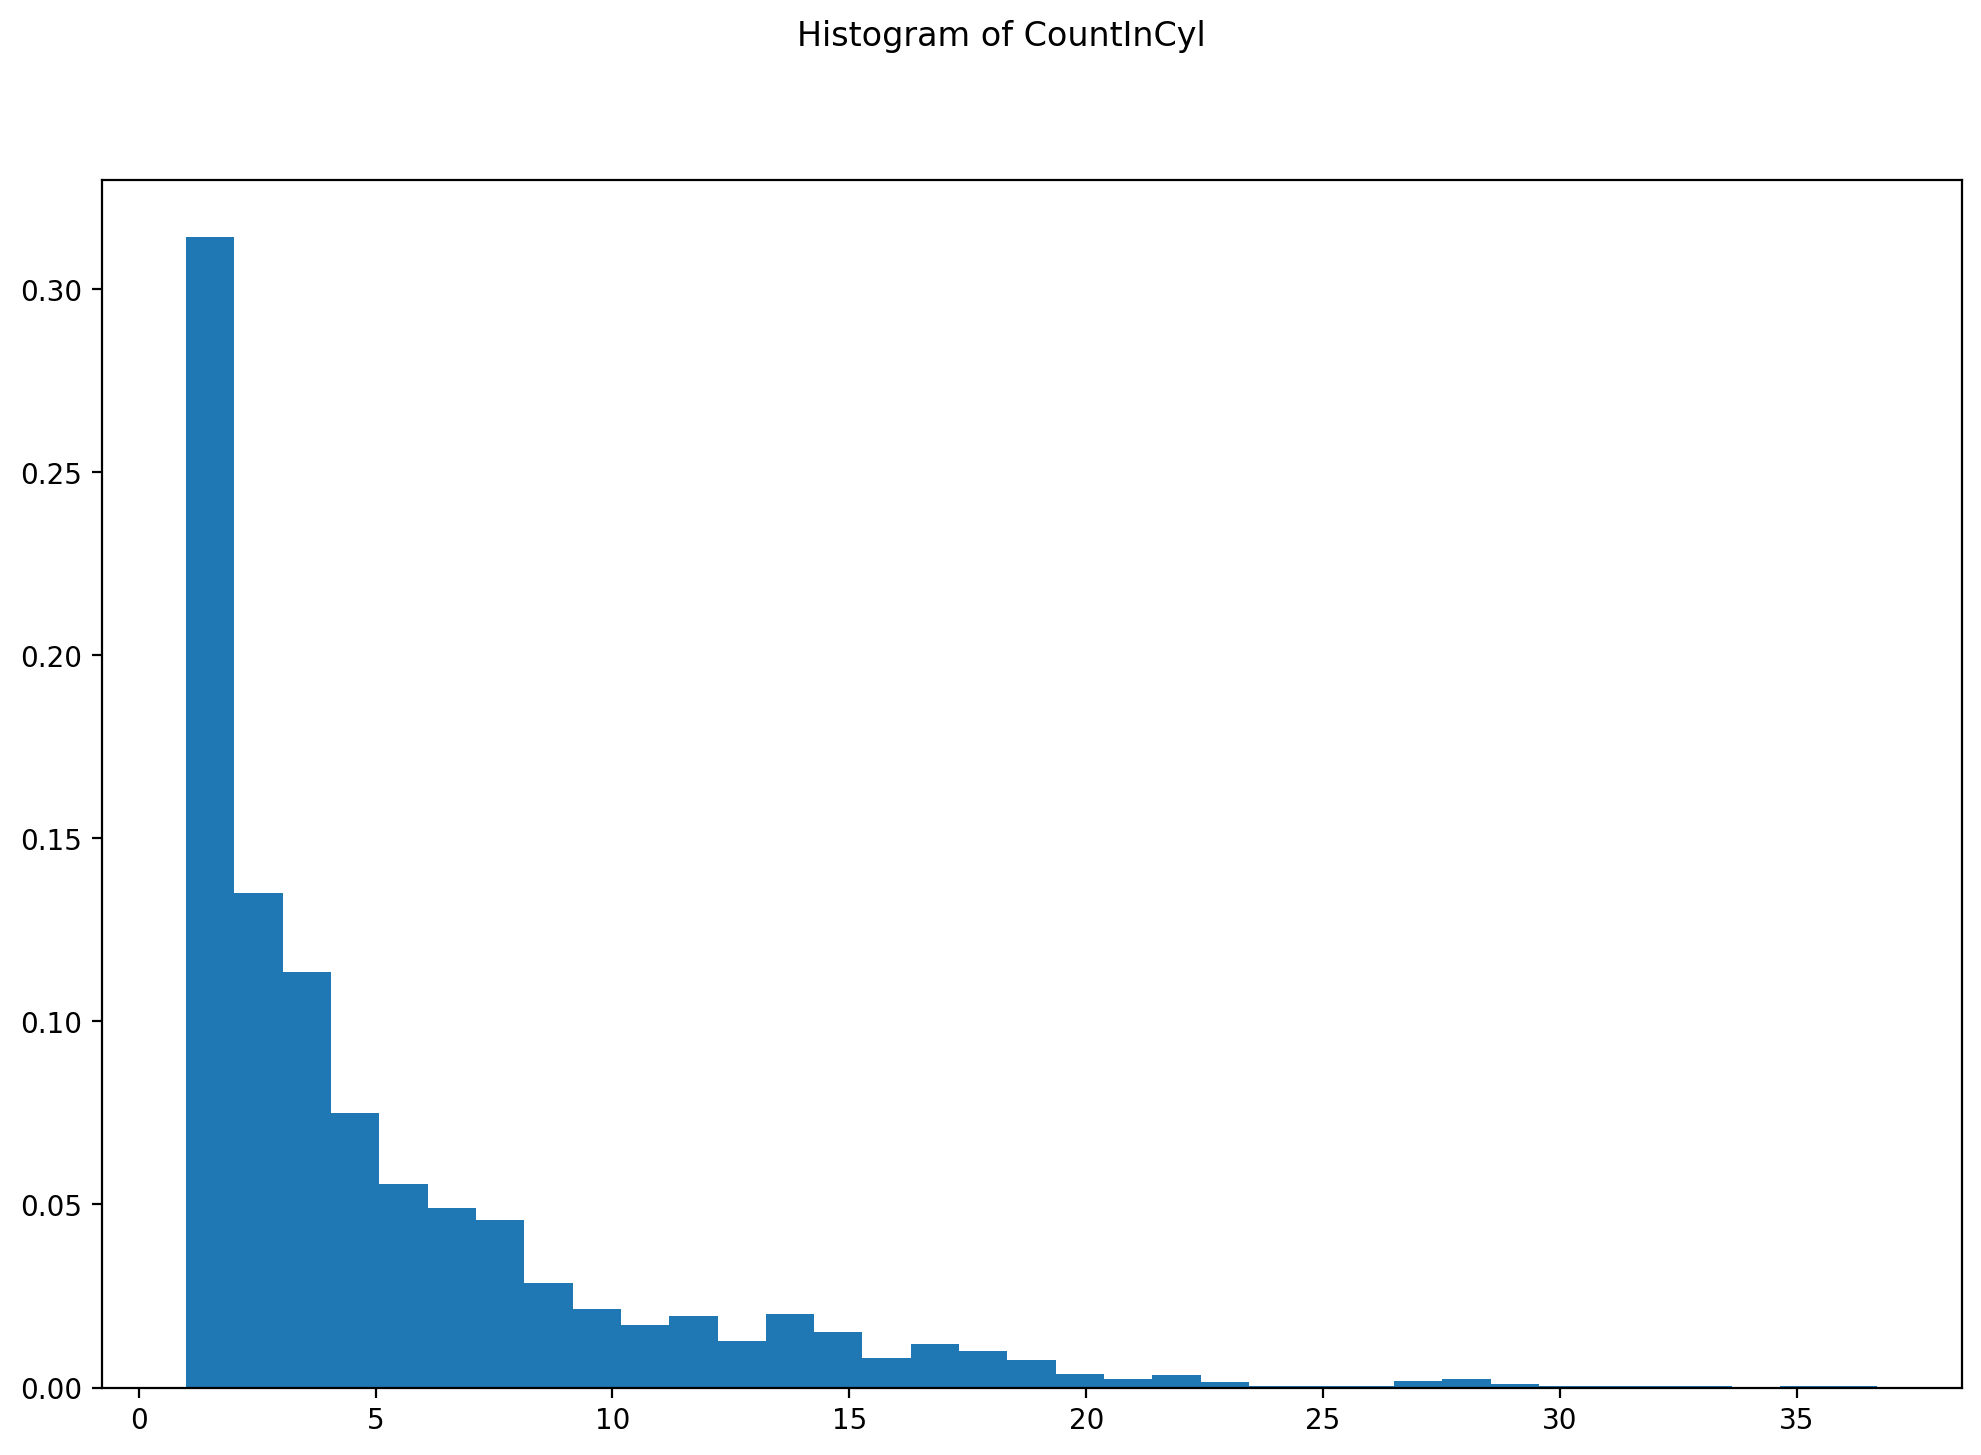

kstest CountInCyl norm : 0.8413447460685429, 0.0
kstest CountInCyl norm greater : 0.0, 1.0
kstest CountInCyl norm less : 0.8413447460685429, 0.0
Shapiro CountInCyl 0.7872155904769897,1.401298464324817e-45
Anderson CountInCyl 129.39187965633982,[0.575 0.655 0.785 0.916 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on DistanceTo5nn


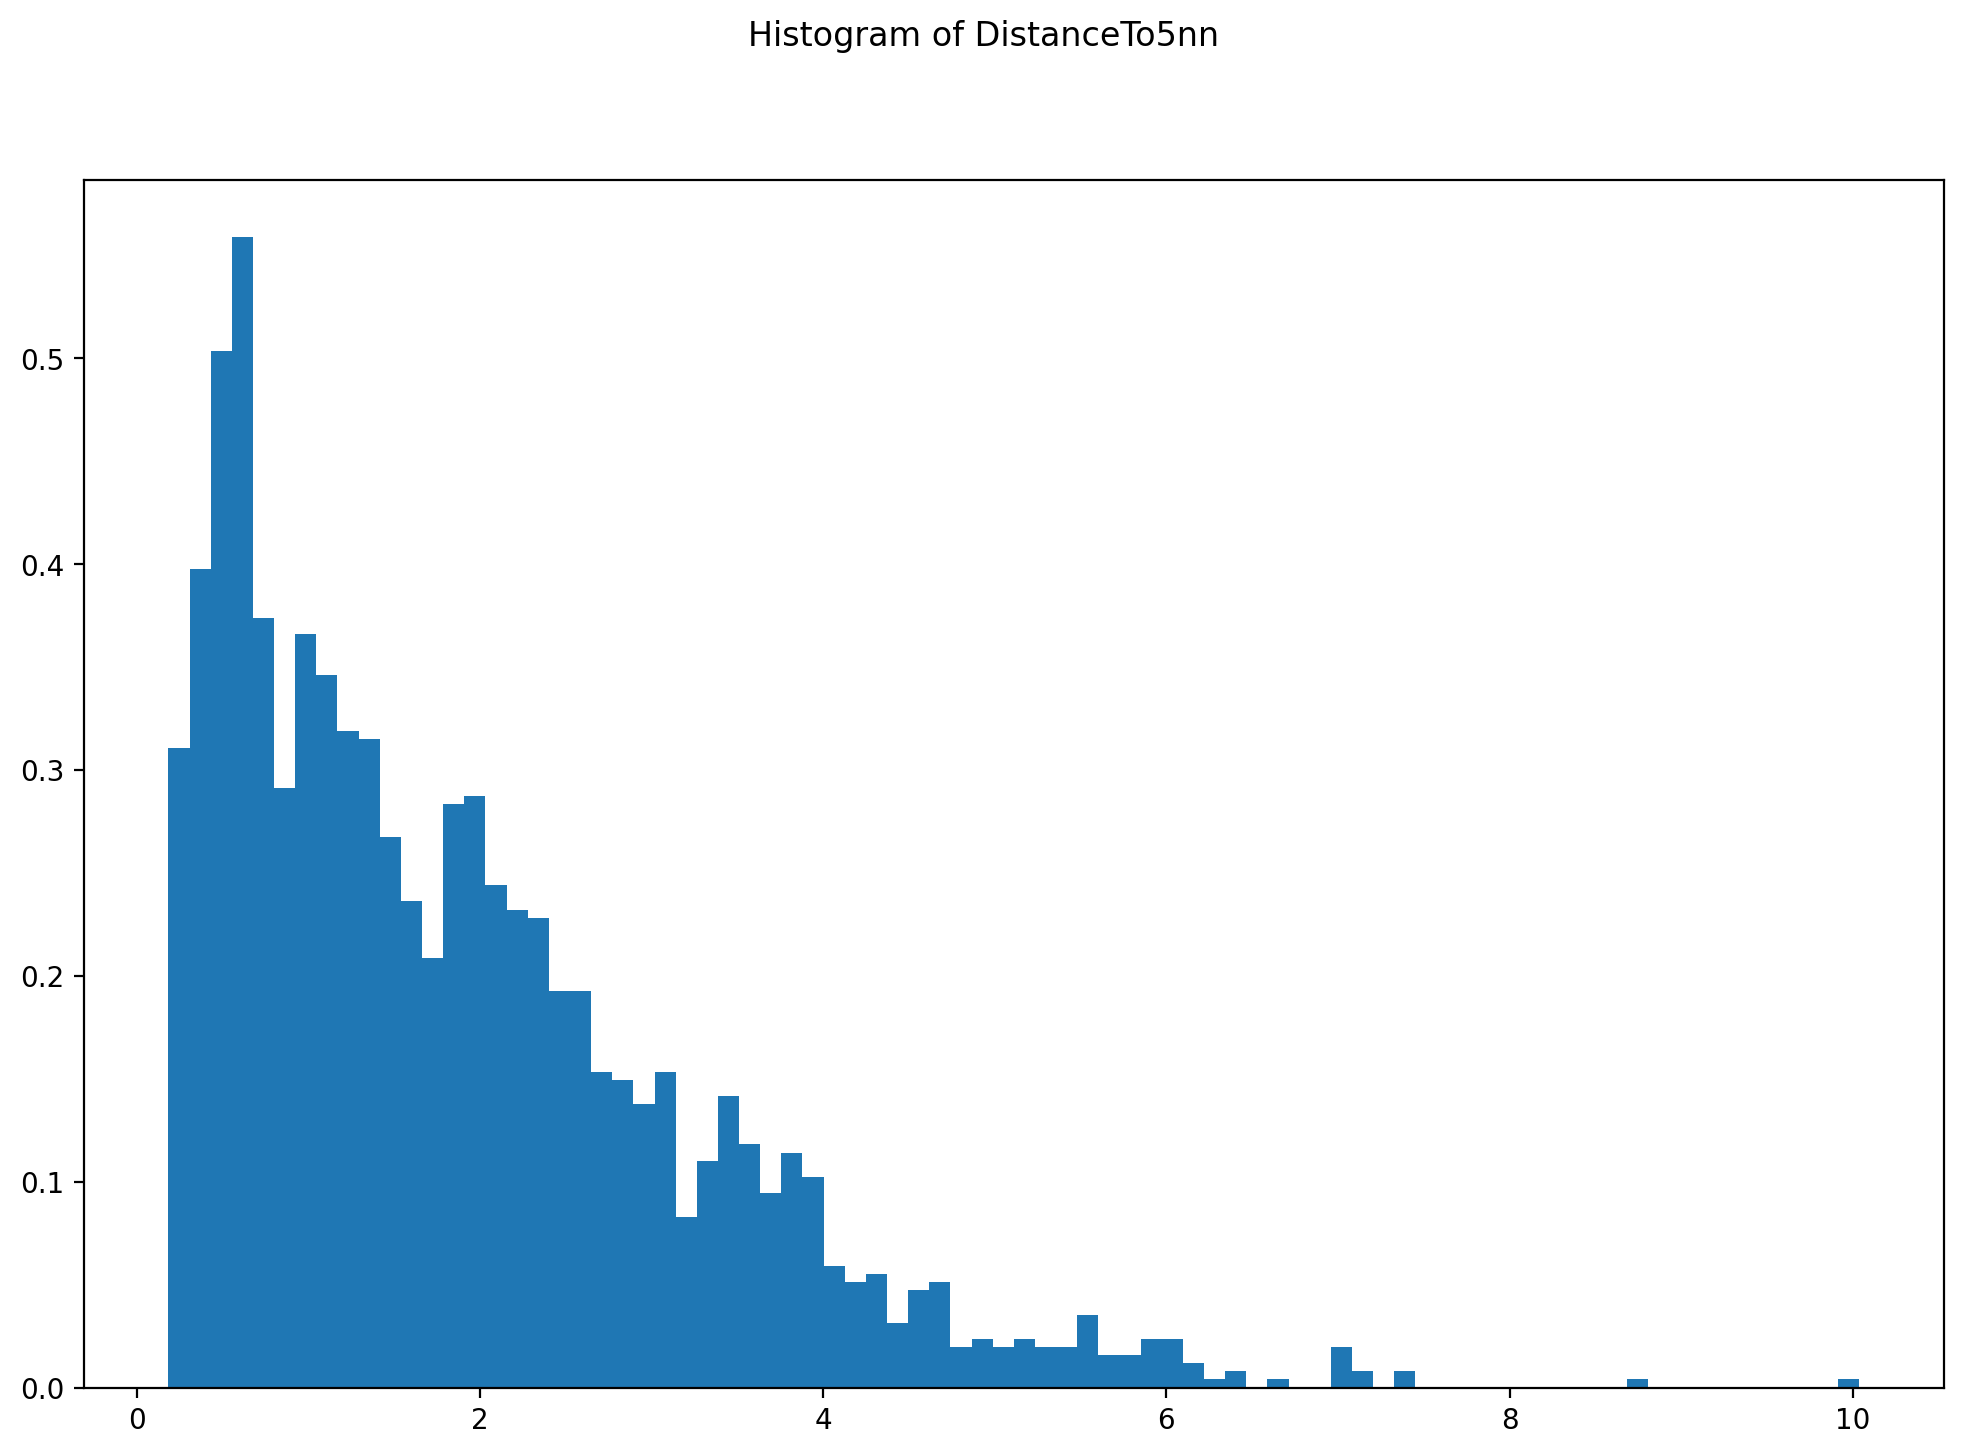

kstest DistanceTo5nn norm : 0.5874829761575442, 0.0
kstest DistanceTo5nn norm greater : 0.0, 1.0
kstest DistanceTo5nn norm less : 0.5874829761575442, 0.0
Shapiro DistanceTo5nn 0.9010786414146423,1.4371575566054055e-34
Anderson DistanceTo5nn 50.293690545042864,[0.575 0.655 0.785 0.916 1.09 ], [15.  10.   5.   2.5  1. ]

Galaxy Environ Type Voids 0 - len : 333
 Determined Lamda value : DistanceTo5nn : 0.564943459204931
Pearson test uminusr versus DistanceTo5nn -0.03678030511601024, 0.5035719358753589
 Determined Lamda value : uminusr : 3.042799585393123
Pearson test uminusr versus uminusr 1.0, 0.0
Pearson test Transformed uminusr versus Transformed DistanceTo5nn -0.054210275862261265, 0.32401031010551784
Galaxy Environ Type Sheet 1 - len : 594
 Determined Lamda value : DistanceTo5nn : 0.5372031024038734
Pearson test uminusr versus DistanceTo5nn -0.078781545473496, 0.05498283318809966
 Determined Lamda value : uminusr : 2.463895905152383
Pearson test uminusr versus uminusr 1.0, 0.0
Pearso

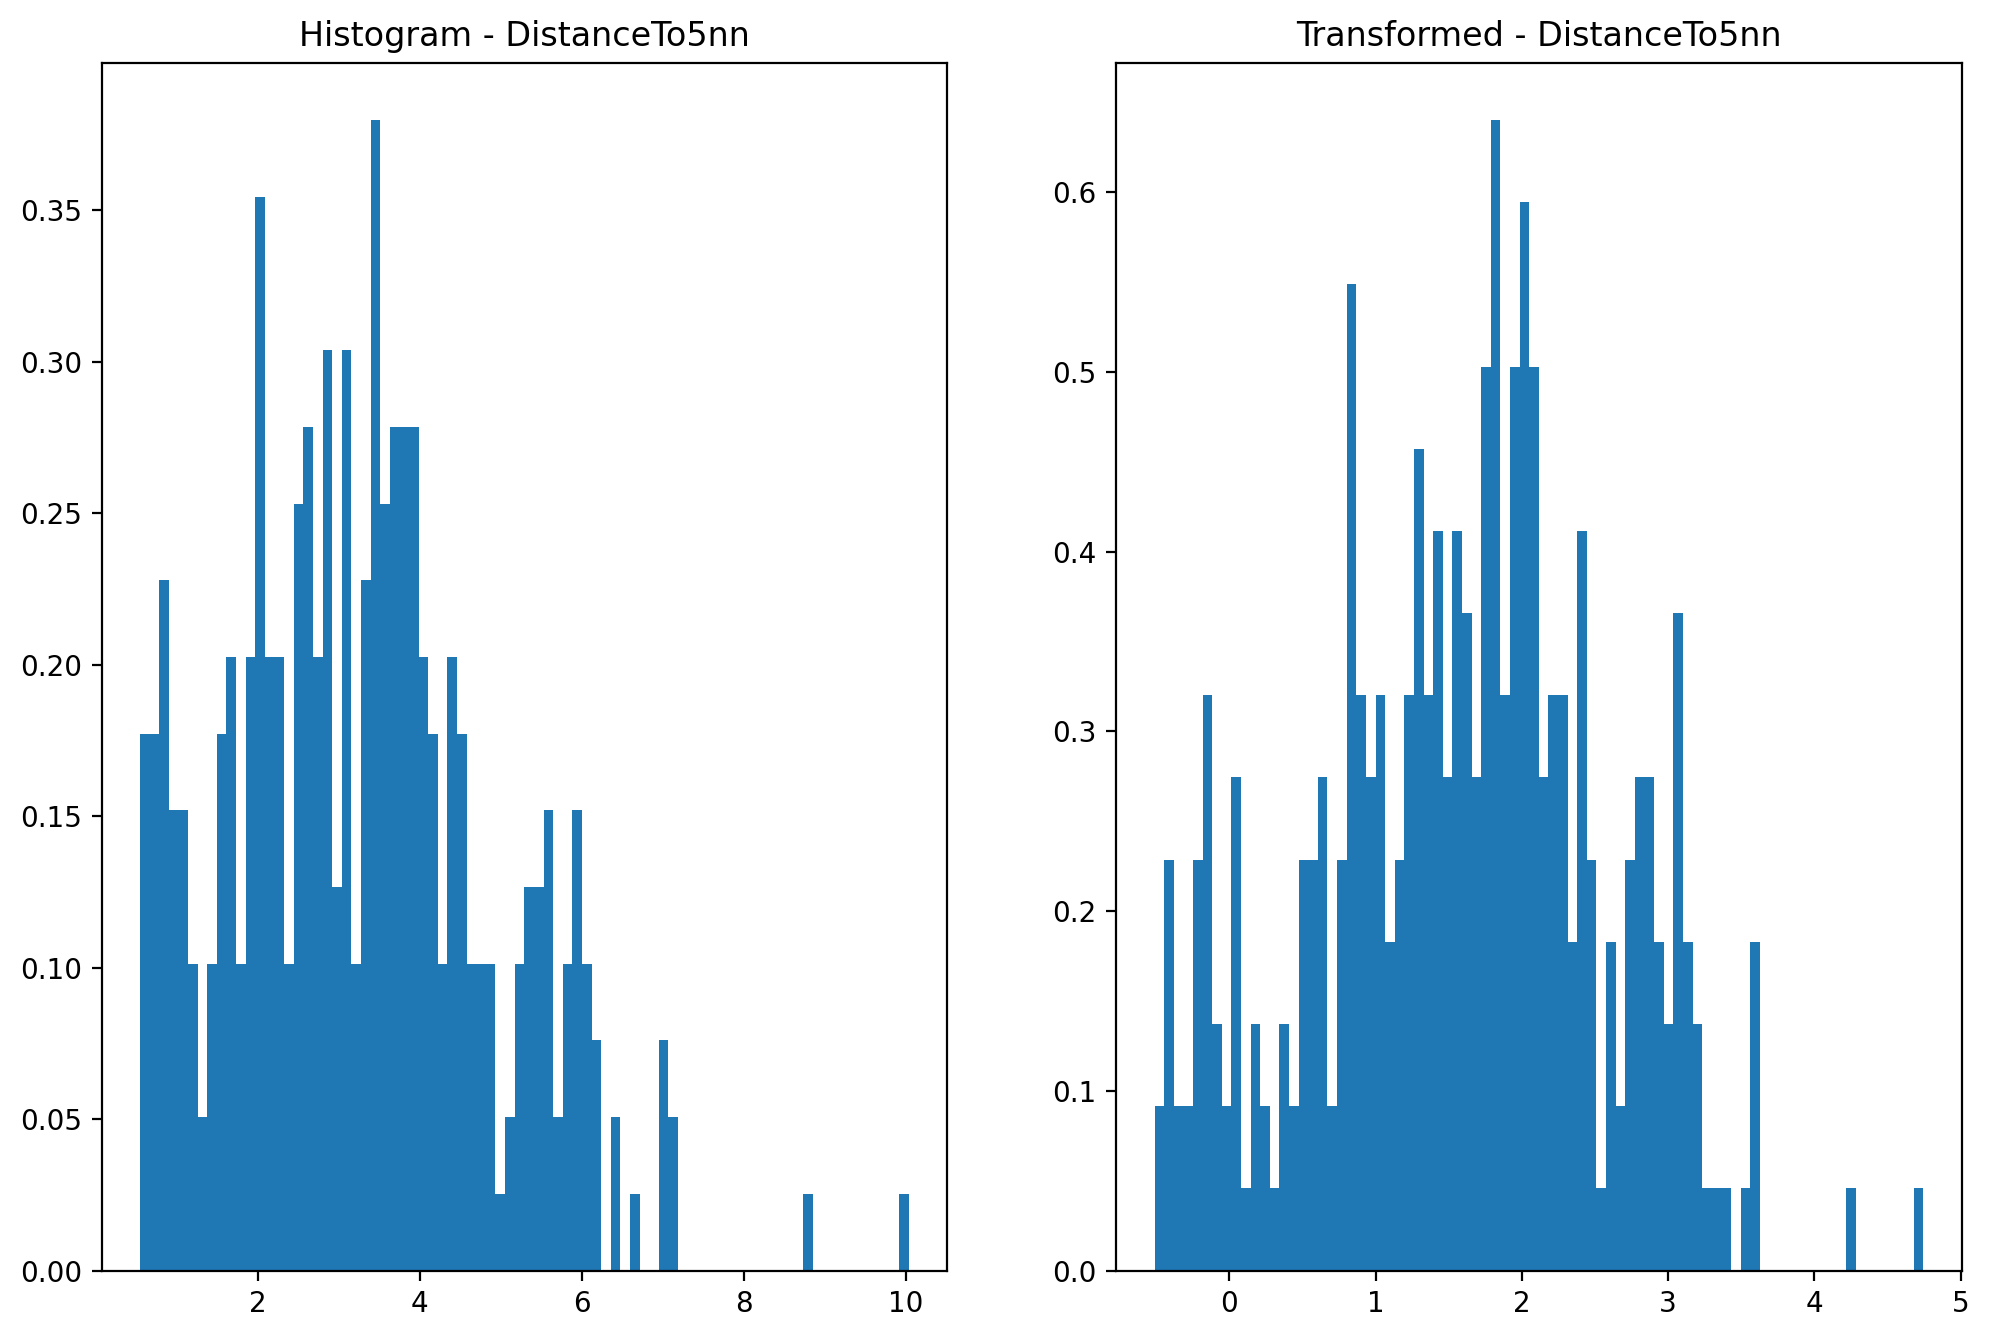

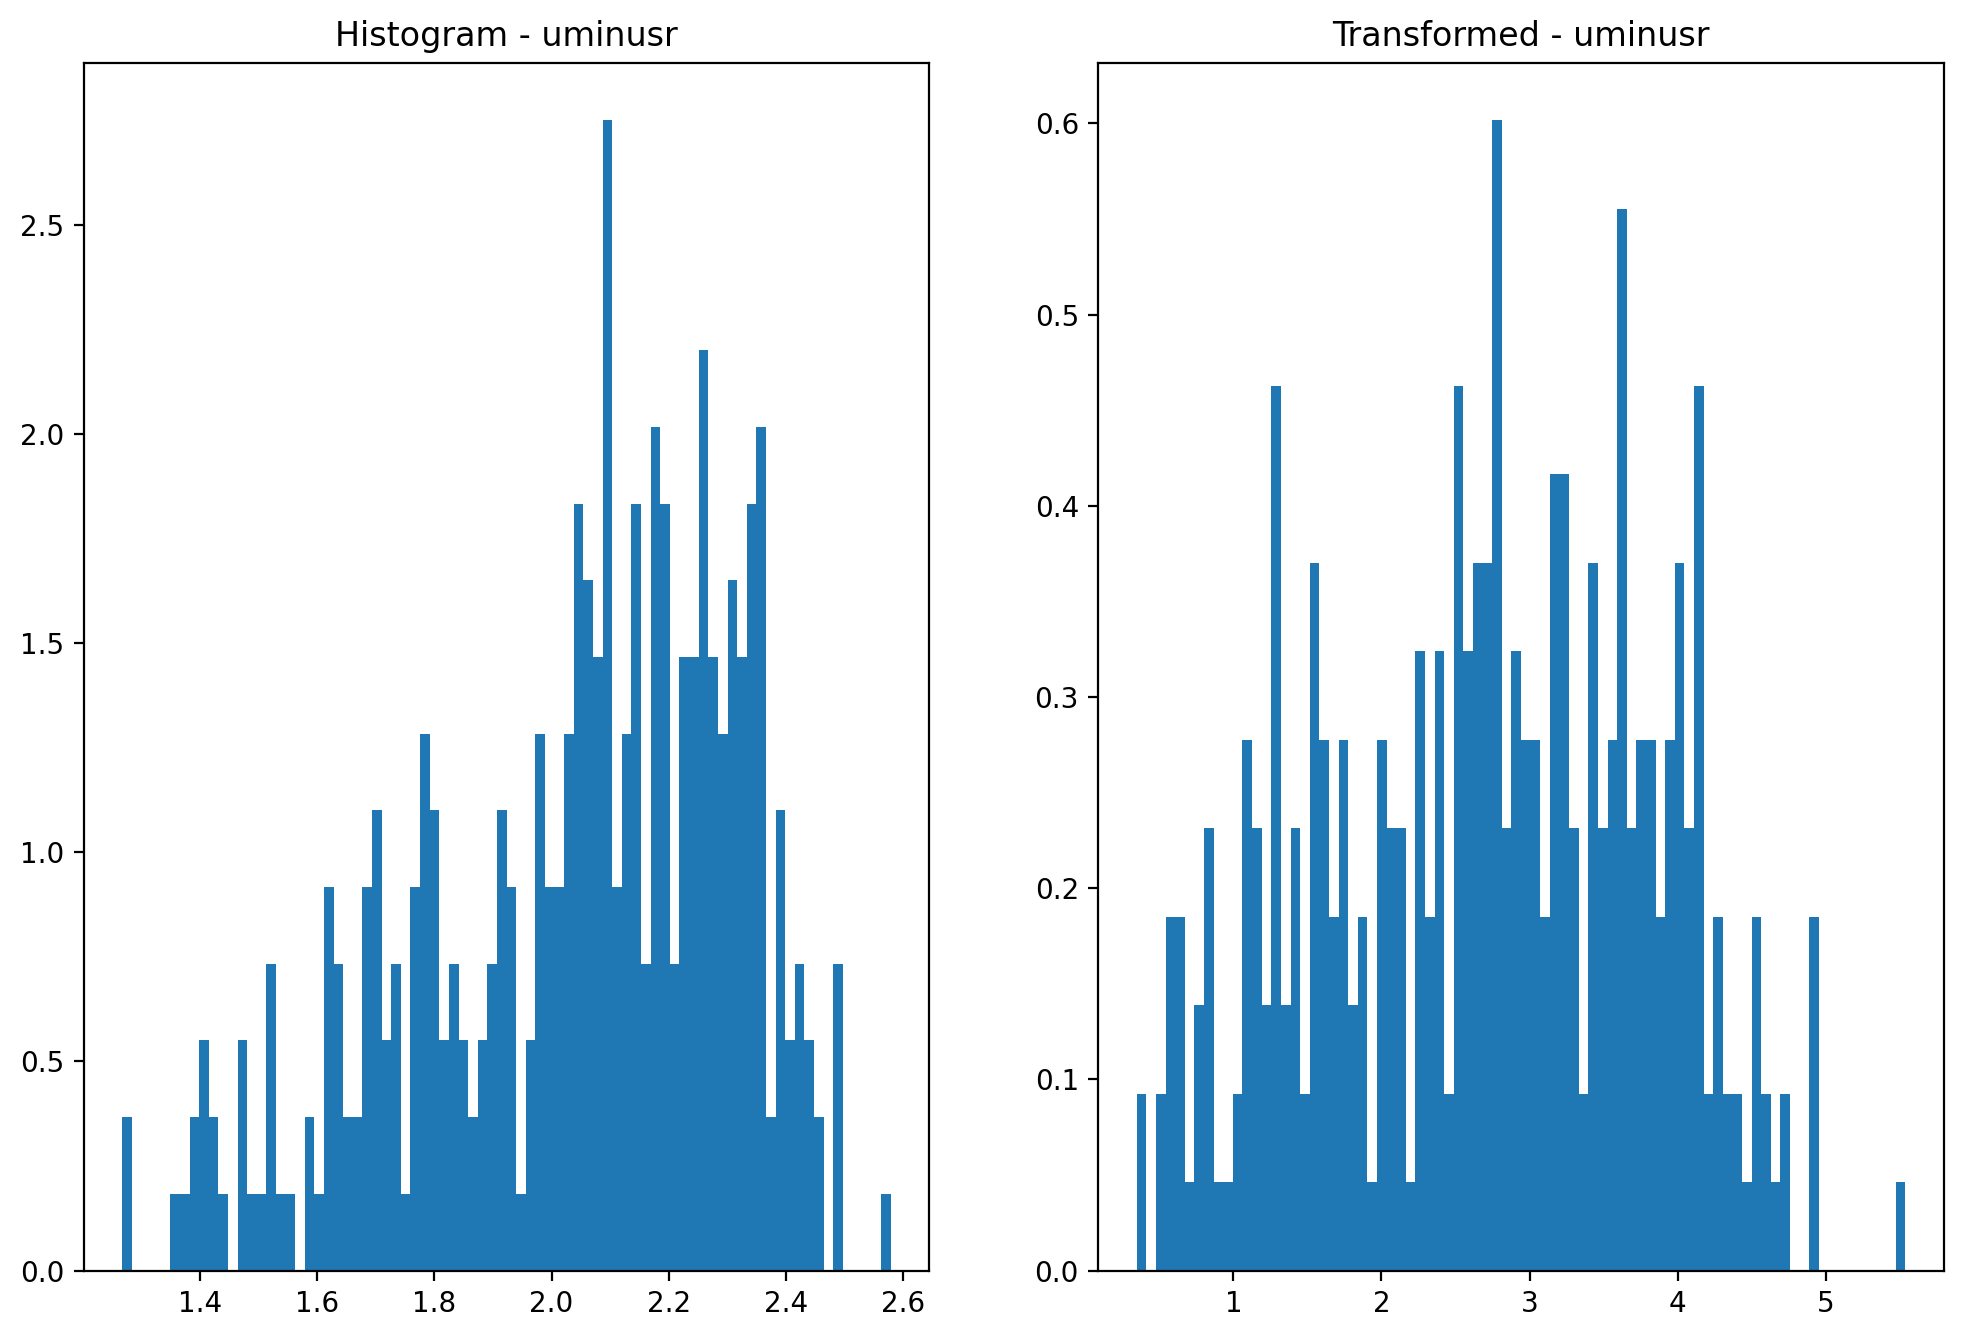

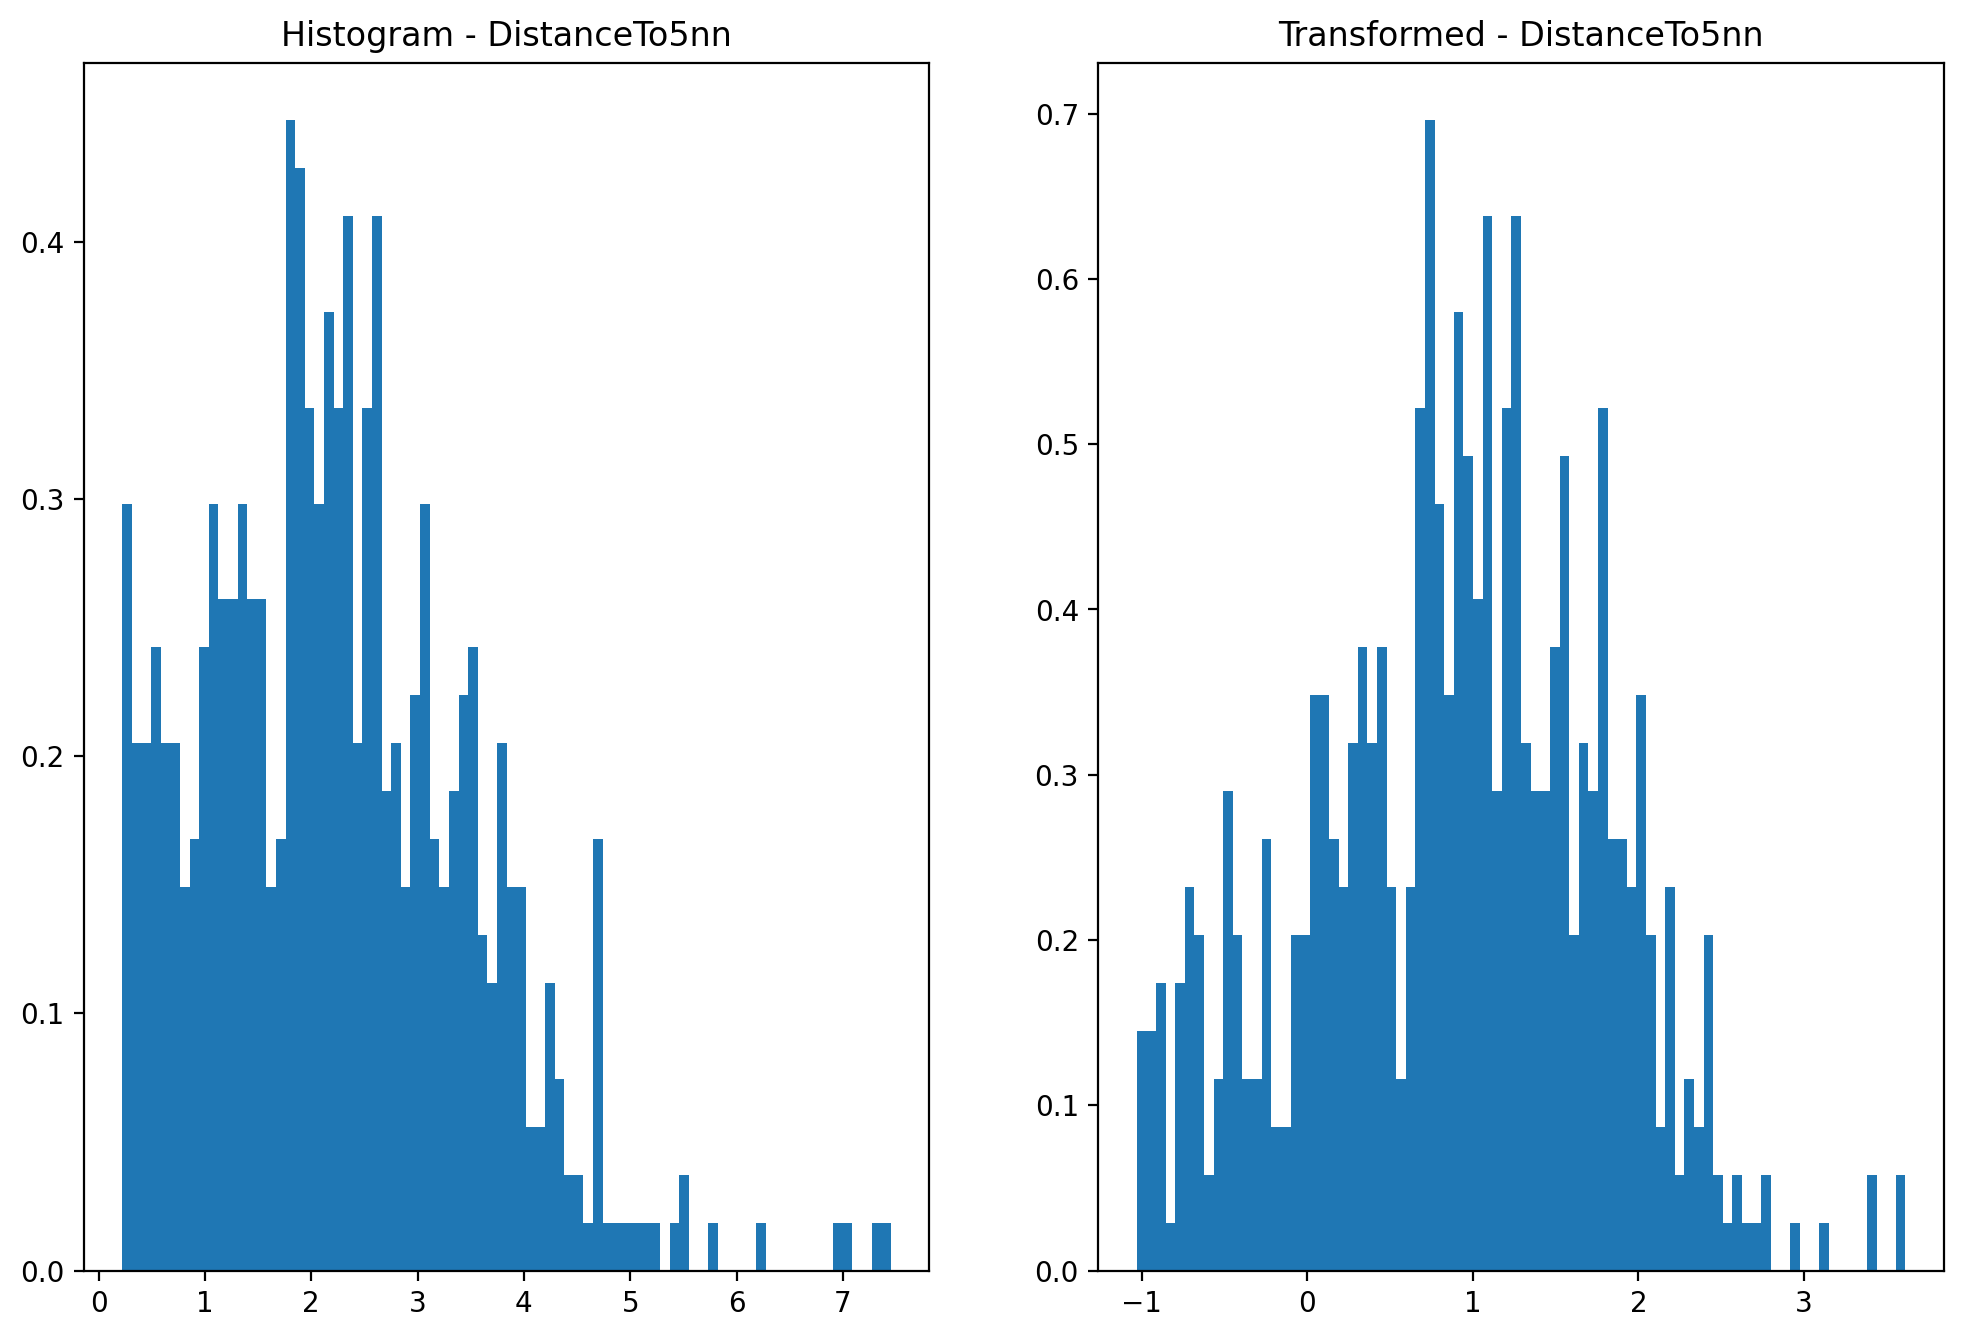

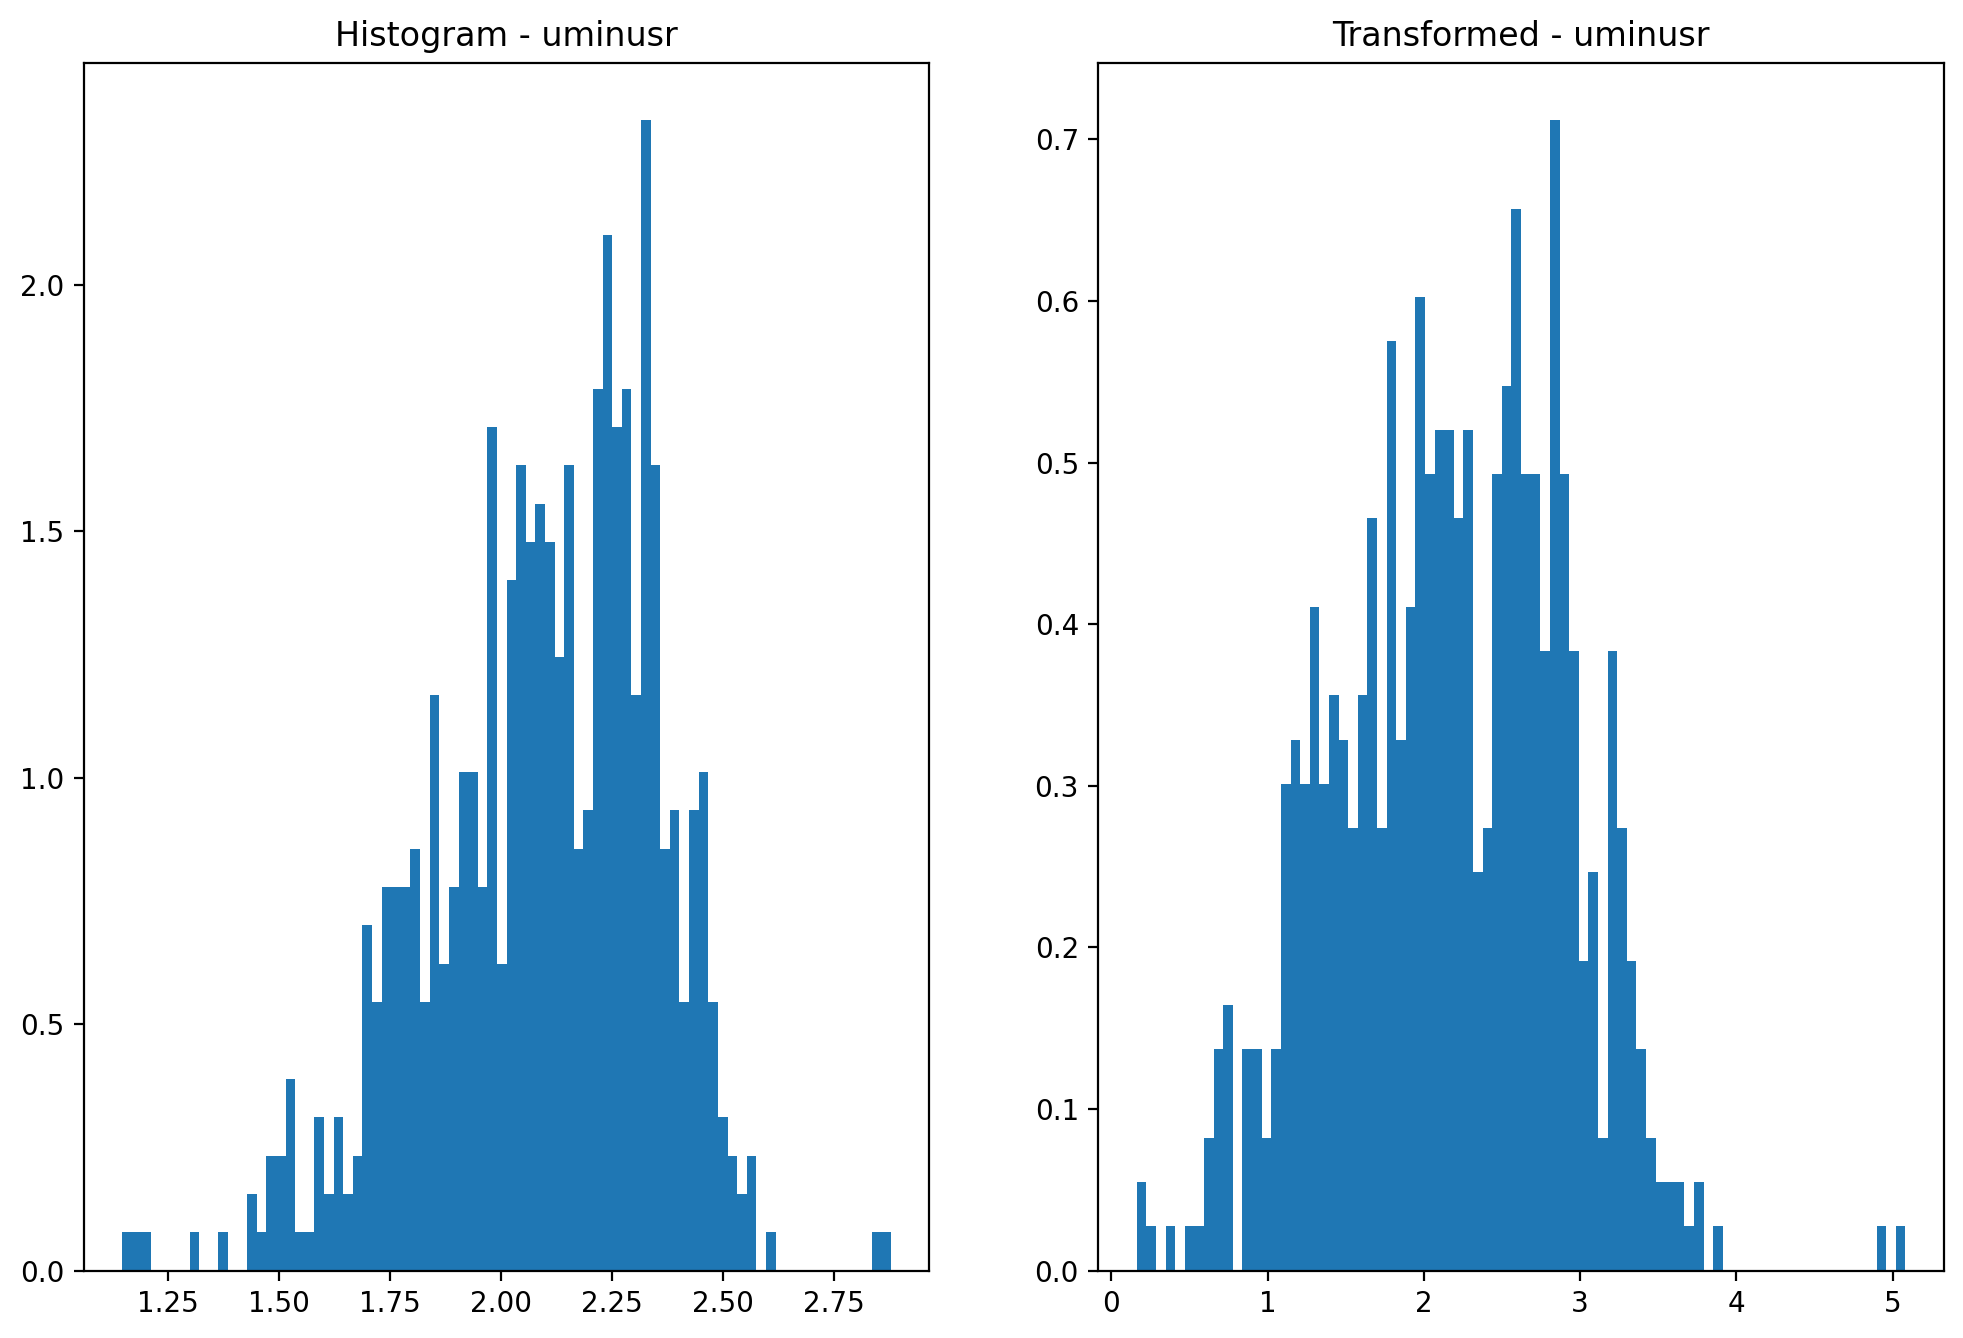

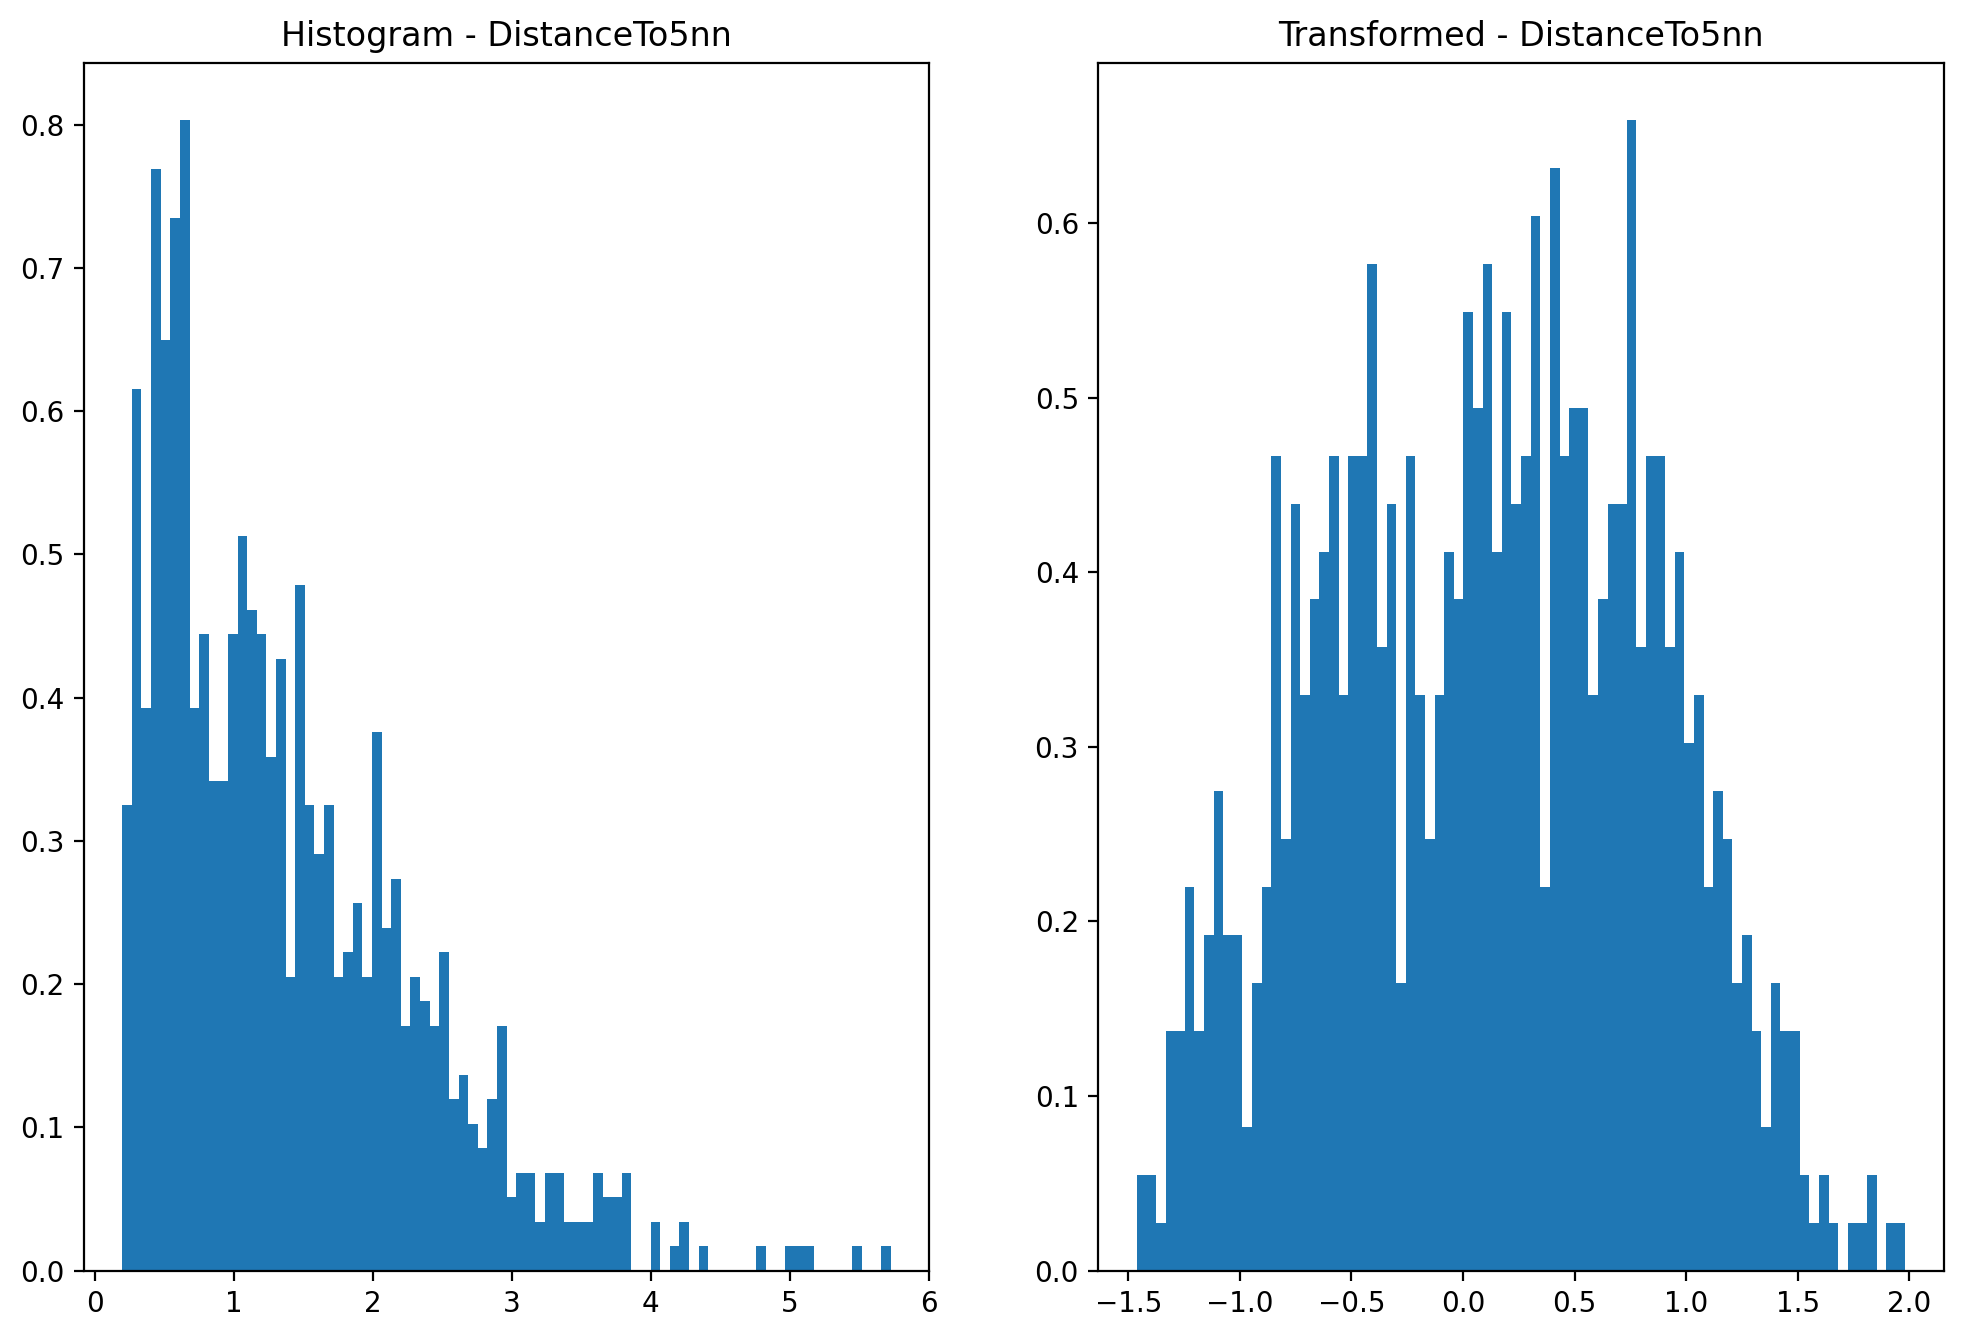

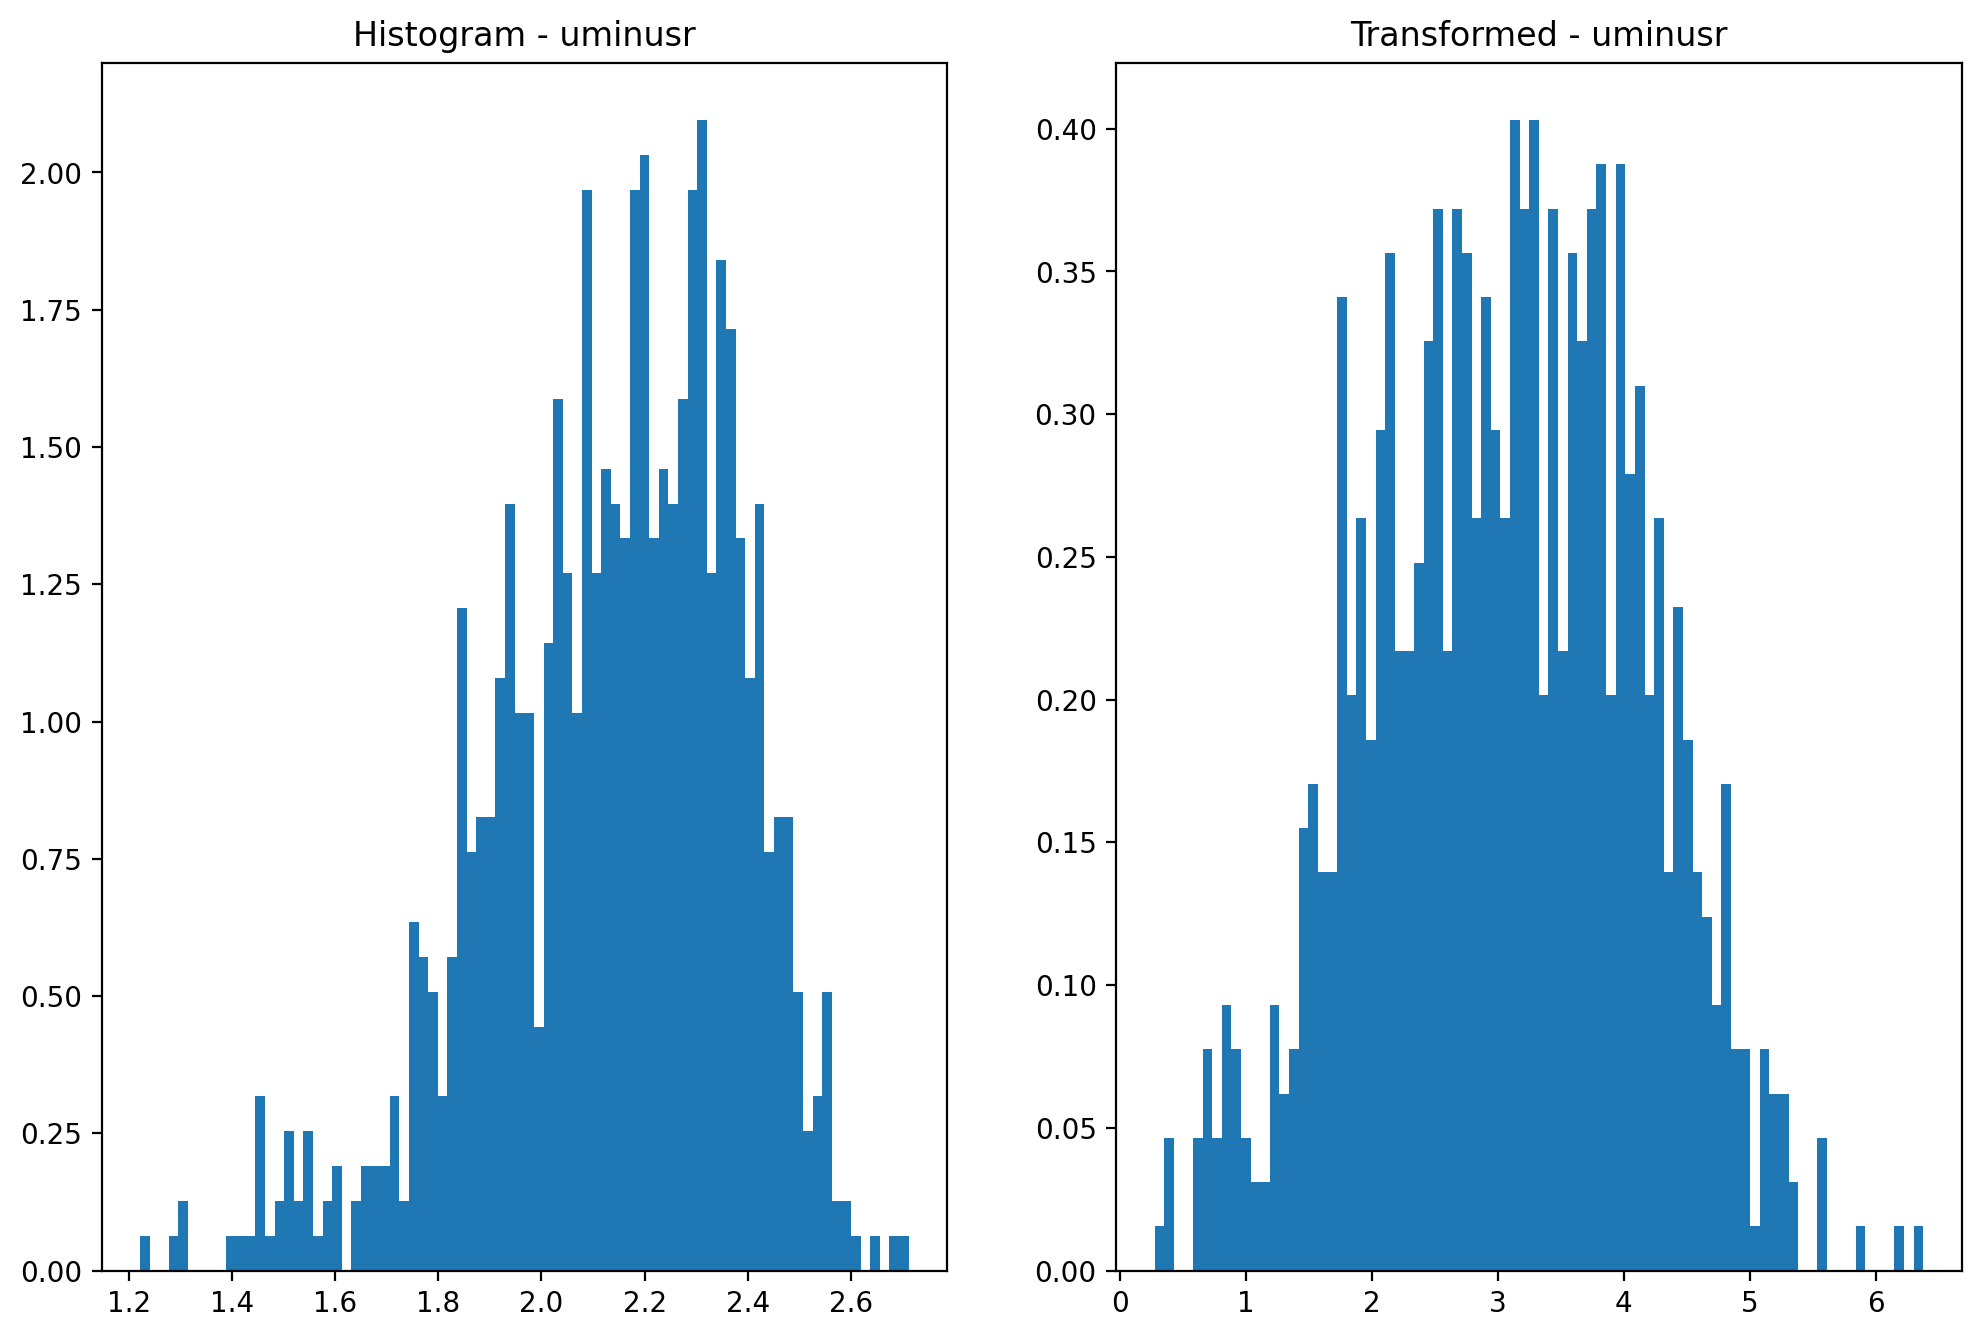

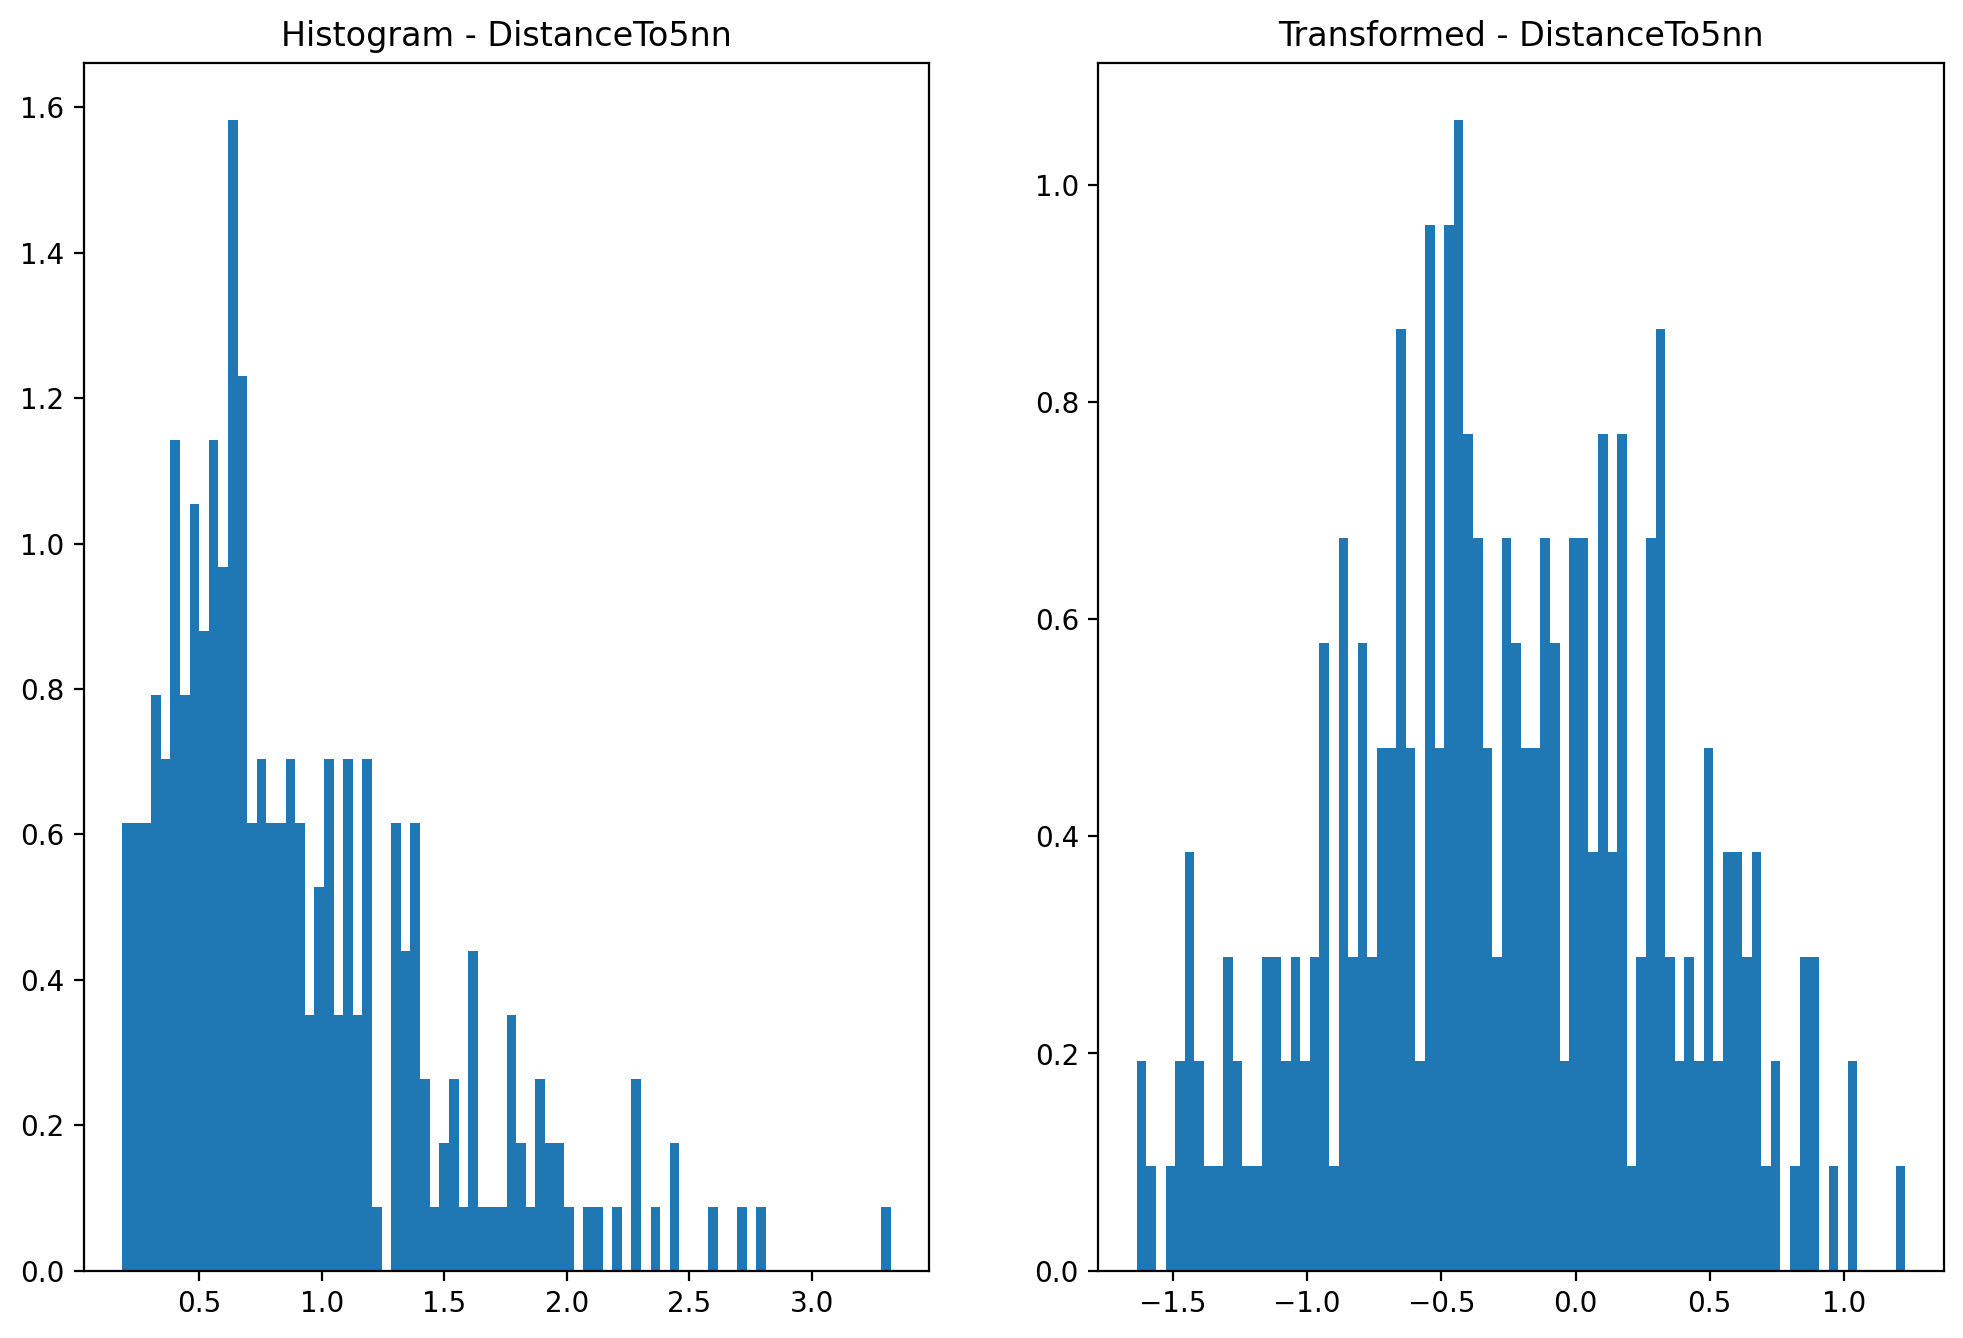

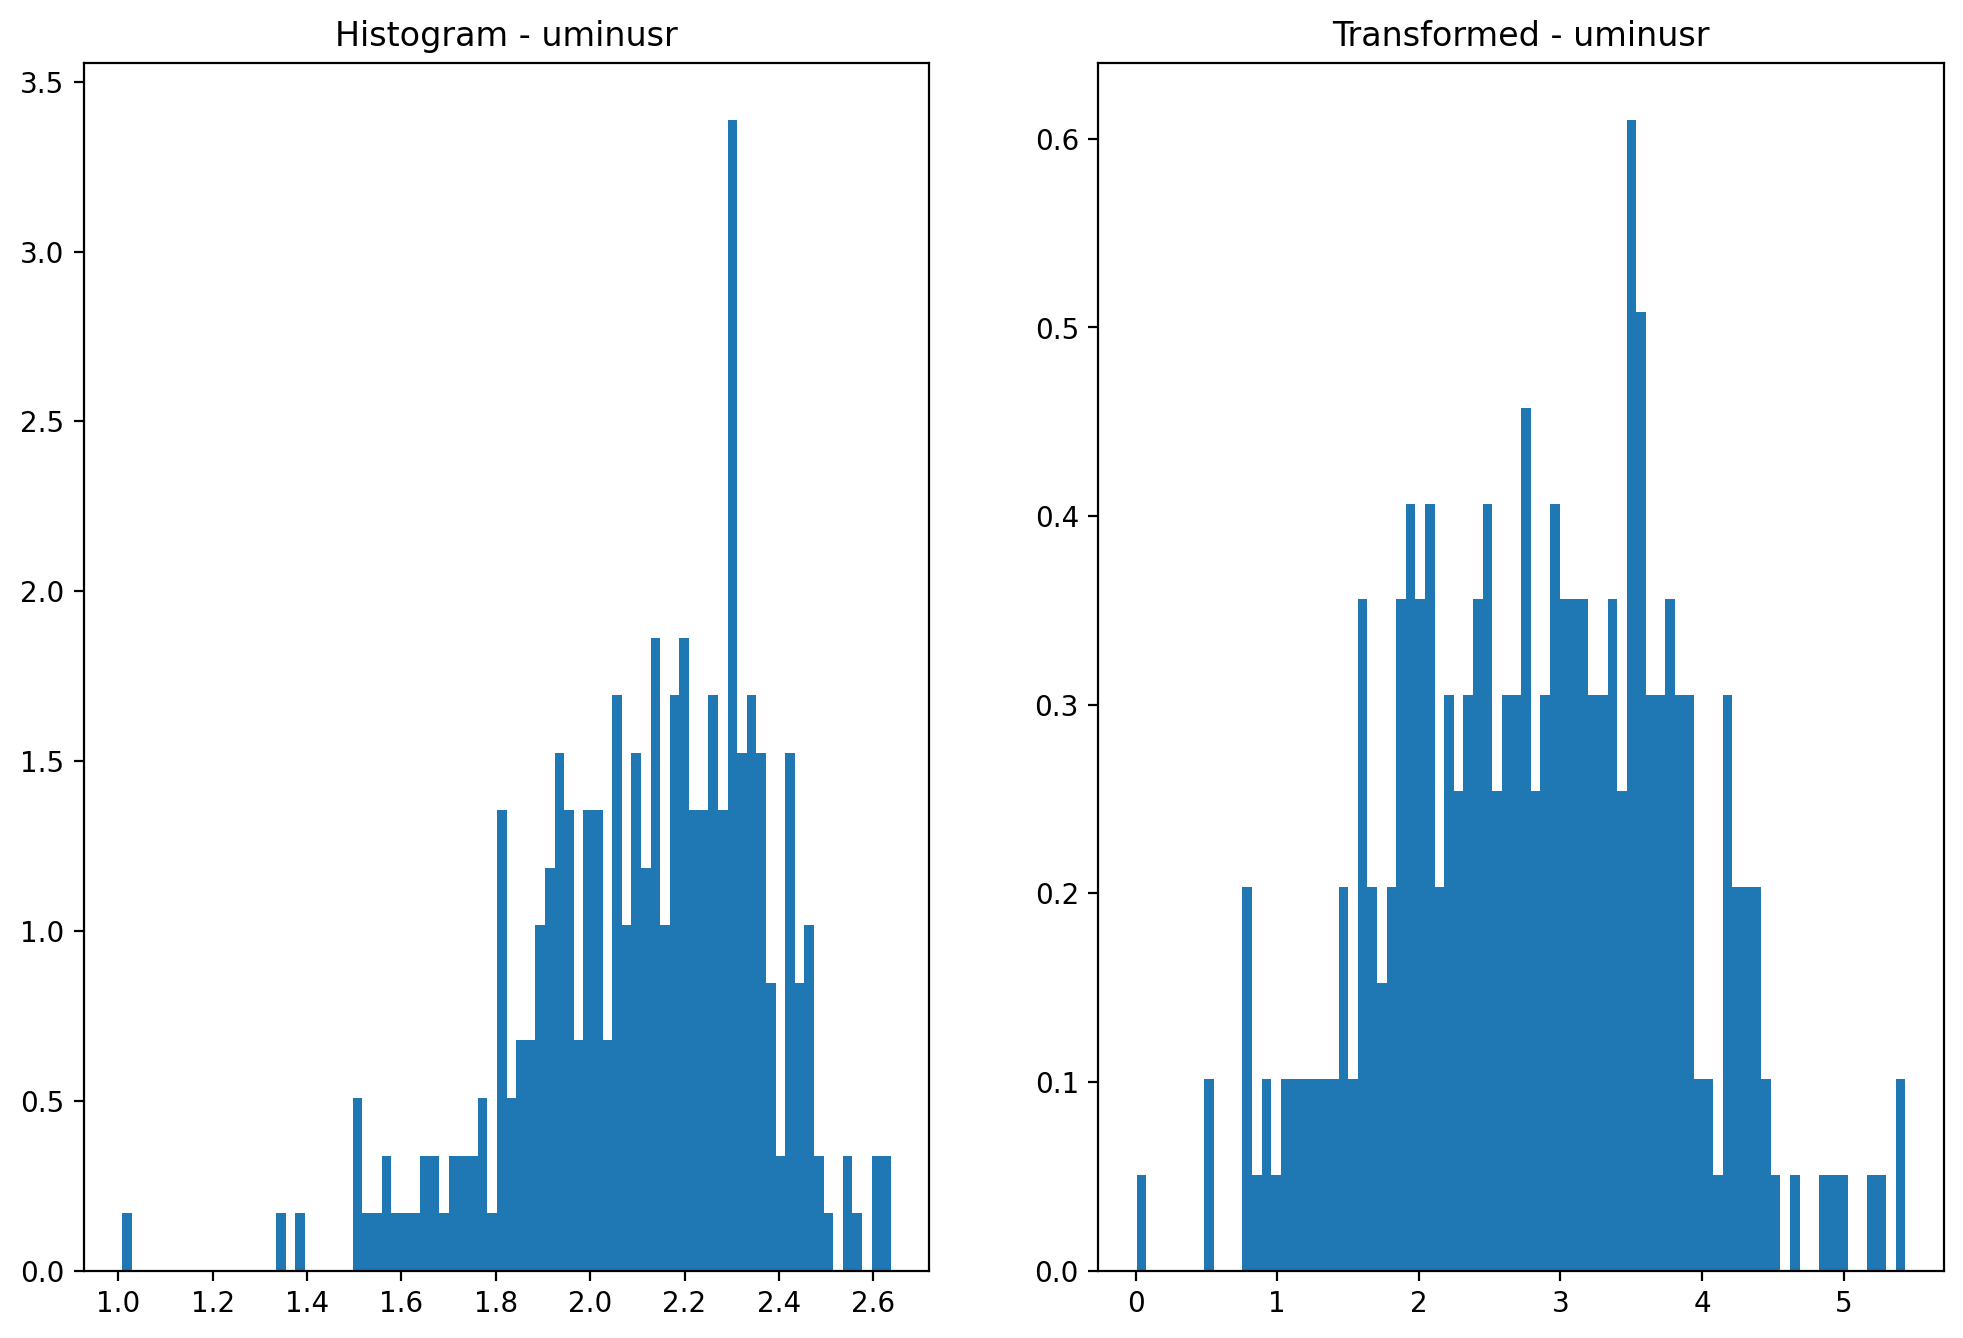

In [8]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy import stats

RawMassEClassEmeasure = Table.read('../../GAMA_Data/EMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA

BaseRange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
BaseRange = BaseRange[BaseRange['SurfaceDensityFlag'] == 0]
BaseRange = BaseRange[BaseRange['AGEDenParFlag'] == 0]
BaseRange = BaseRange[BaseRange['CountInCylFlag'] == 0]
BaseRange = BaseRange[BaseRange['uminusr']> 0.001]
BaseRange = BaseRange[BaseRange['SurfaceDensity']< 50]
#Erange = RErange[RErange['uminusr']< 2.7]
#RErange = RErange[RErange['CountInCyl'] > 0]
BaseRange['CountInCyl'] = BaseRange['CountInCyl'] + 1

def testNorm(xfield, binCount) :
    
   print('Normal Test on '+xfield)
   fig = plt.figure(figsize=(12, 8), dpi=200)
   fig.suptitle('Histogram of '+xfield)
   ax1 = fig.add_subplot(1, 1, 1)
   
   ax1.hist(BaseRange[xfield].data, bins=binCount, density=True)
   plt.show() 
   r, p = stats.kstest(BaseRange[xfield], 'norm')
   print('kstest '+xfield+' norm : ' +str(r)+', '+str(p))
                                  
   r, p = stats.kstest(BaseRange[xfield], 'norm',alternative='greater')
   print('kstest '+xfield+' norm greater : ' +str(r)+', '+str(p))
                                  
   r, p = stats.stats.kstest(BaseRange[xfield], 'norm',alternative='less')
   print('kstest '+xfield+' norm less : ' +str(r)+', '+str(p))
    
   r, p = stats.shapiro(BaseRange[xfield])
   print('Shapiro '+xfield+' '+str(r)+','+str(p))

   s, cl, sl  = stats.anderson(BaseRange[xfield],'norm')
   print('Anderson '+xfield+' '+str(s)+','+str(cl)+', '+str(sl))
   print() 


def transformNone(xfield, binCount) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.title.set_text('Histogram - '+xfield) 
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   transdata, lamda = stats.boxcox(RErange[xfield])
   #print(len(ret))
   #print(ret)
    
   #transdata, lamda = stats.boxcox(RErange[xfield])
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.title.set_text('Transformed - '+xfield)
   ax2.hist(transdata, bins=binCount, density=True)
   print(' Determined Lamda value : '+xfield+' : '+str(lamda))
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))
   return transdata

def transformLamda(xfield, binCount, lamda) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.title.set_text('Histogram - '+xfield) 
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata = stats.boxcox(RErange[xfield],lamda)
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.title.set_text('Transformed - '+xfield+' Lamda='+str(lamda))
   ax2.hist(transdata, bins=binCount, density=True)
   print(' Determined Lamda value : '+xfield+' : '+str(lamda))
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))    

def transformLog(xfield, binCount) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.title.set_text('Histogram - '+xfield) 
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata = np.log(RErange[xfield])
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.title.set_text('Log transformation - '+xfield) 
   ax2.hist(transdata, bins=binCount, density=True)
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))   
    
testNorm('uminusr',80)
testNorm('CountInCyl',35)
testNorm('DistanceTo5nn',80)

type = ['Voids','Sheet','Filament','Knot']
for i in range(0,4) :
    RErange = BaseRange[BaseRange['GeoS4'] == i]
    #transformLamda('CountInCyl', 35, 0.7)
    #transformLog('CountInCyl', 10)
    l = len(RErange)
    print('Galaxy Environ Type '+type[i]+' '+str(i)+' - len : '+str(l))
    if l > 0 :
       T_DistanceTo5nn = transformNone('DistanceTo5nn',80)
       T_uminusr = transformNone('uminusr',80)

       r, p = stats.pearsonr(T_uminusr,T_DistanceTo5nn)
       print('Pearson test Transformed uminusr versus Transformed DistanceTo5nn '+str(r)+', '+str(p))   

plt.show()


